### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model
import pickle
import random
import os
# from project directory
import deep_learning_model
import preprocess_images
import preprocess_text
import evaluation

### Evaluation

In [2]:
#loading mappings
word_to_ind, ind_to_word = pickle.load(open('mappings.p', 'rb'))

In [3]:
#loading captions
data = pd.read_csv('flickr-8k/captions.txt')

In [4]:
# selecting random examples of dataset
np.random.seed(42)
sample = list(data['image'].sample(n=4).values)
sample = ['flickr-8k/Images/' + i for i in sample]
sample

['flickr-8k/Images/2973269132_252bfd0160.jpg',
 'flickr-8k/Images/270263570_3160f360d3.jpg',
 'flickr-8k/Images/2053006423_6adf69ca67.jpg',
 'flickr-8k/Images/512101751_05a6d93e19.jpg']

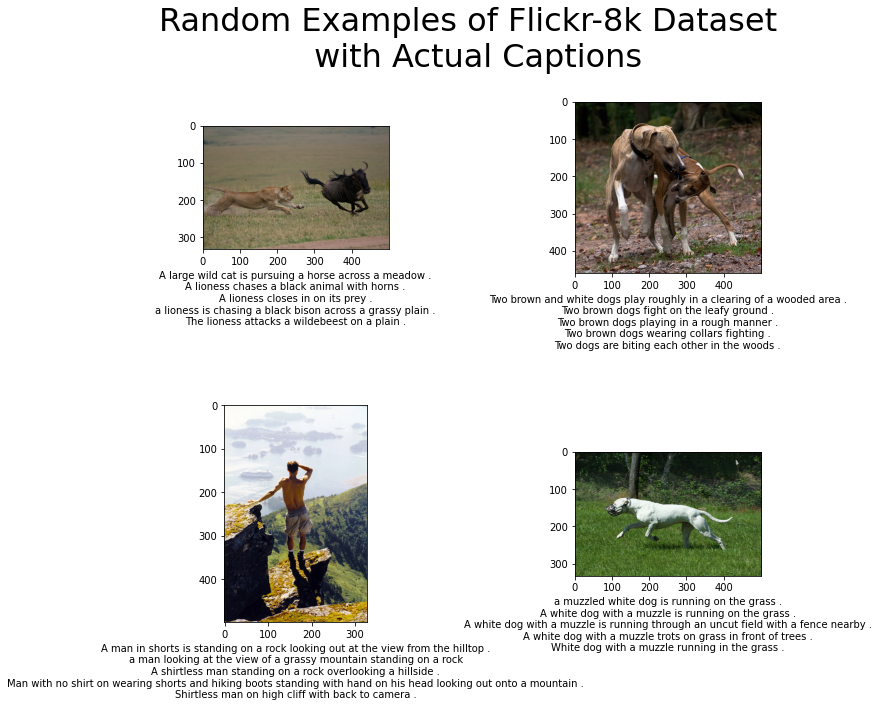

In [5]:
#plotting random samples
evaluation.create_plot(sample, title='Random Examples of Flickr-8k Dataset \n with Actual Captions')

In [6]:
#loading model
model = load_model('./image_captioner')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 37)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4096)         16384       input_1[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 37, 128)      1134336     input_2[0][0]                    
_______________________________________________________________________________________

In [7]:
#making predictions on random samples
predictions = evaluation.make_prediction(sample, model, word_to_ind, ind_to_word)

Predicting image: flickr-8k/Images/2973269132_252bfd0160.jpg
Predicting image: flickr-8k/Images/270263570_3160f360d3.jpg
Predicting image: flickr-8k/Images/2053006423_6adf69ca67.jpg
Predicting image: flickr-8k/Images/512101751_05a6d93e19.jpg


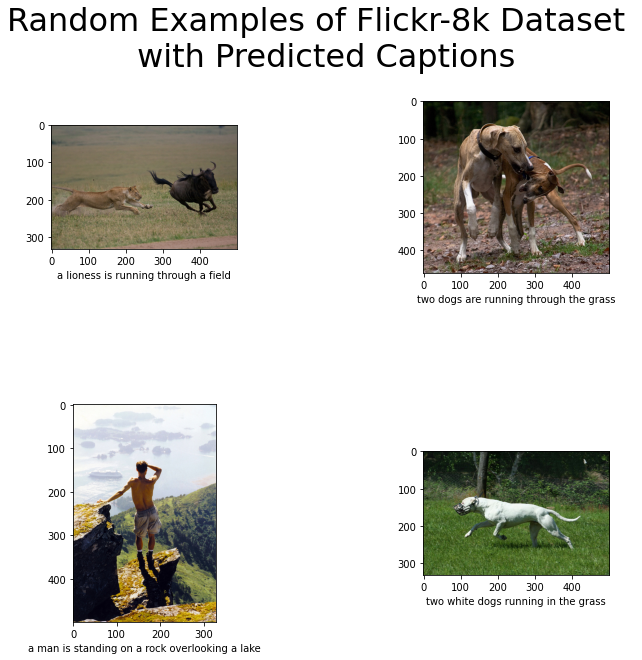

In [8]:
#plotting random samples and their predictions
evaluation.create_plot(sample, title='Random Examples of Flickr-8k Dataset \n with Predicted Captions', captions=predictions)

### Evaluation on Unseen Images

cat image: https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/Madagascar_cats_1280x720.jpg?itok=RSiy1JlK

soccer image: https://www.totalsoccer.us/blog/wp-content/uploads/2018/11/shutterstock_149585354-2000x1200.jpg

turtle image: https://ocean.si.edu/sites/default/files/styles/photo_full/public/2018-12/turtle-863336_1280.jpg?itok=hFwB0Jeo

car image: https://cnet3.cbsistatic.com/img/gAXFdr09Cvn77_NWrPb5GMWi3zM=/940x0/2016/12/06/a972983a-04ea-47f7-a8e6-45d40f77807e/audia4trafficlightinfo-2.jpg

bird image: https://arbordayblog.org/wp-content/uploads/2019/08/iStock-961007580-1.jpg

snow image: https://upload.wikimedia.org/wikipedia/commons/9/9e/D%C3%BCsseldorf_Hofgarten_2009.jpg

building image: https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Falling_snow_Graz_2005_original.jpg/1280px-Falling_snow_Graz_2005_original.jpg

jet ski image: https://upload.wikimedia.org/wikipedia/commons/5/57/Jet_ski_at_Eforie_Nord%2C_Romania_%282%29.JPG

reading image: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcStF5D6PGU3_gZS8NMRH9XRzy6OANQ8hAKagQ&usqp=CAU


In [9]:
#initializing unseen directory
unseen_directory = './evaluation-images/'

In [10]:
#extracting filenames from directory
unseen_ids = os.listdir(unseen_directory)
unseen_ids = [unseen_directory + i for i in unseen_ids]

In [11]:
#making predictions
unseen_predictions = evaluation.make_prediction(unseen_ids, model, word_to_ind, ind_to_word)

Predicting image: ./evaluation-images/bird.jpg
Predicting image: ./evaluation-images/building.jpg
Predicting image: ./evaluation-images/car.jpg
Predicting image: ./evaluation-images/cat.jpg
Predicting image: ./evaluation-images/jet ski.jpg
Predicting image: ./evaluation-images/reading.jpg
Predicting image: ./evaluation-images/snow.jpg
Predicting image: ./evaluation-images/soccer.jpg
Predicting image: ./evaluation-images/turtle.jpg


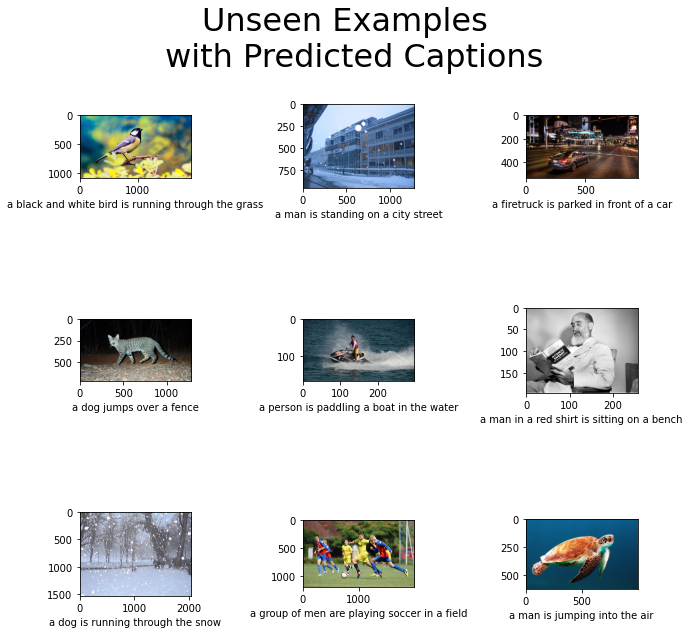

In [12]:
#plotting unseen images and their captions
evaluation.create_plot(unseen_ids, unseen_predictions, title='Unseen Examples \n with Predicted Captions')

### Take Aways

It is possible for a merged architecture CNN-LSTM neural network to learn:
- some key features of an image such as what/who is present, where they are and what they are doing
- sentence structure of the caption, the captions are generally of correct grammatical structure
- predict the next word in a caption, given the image and previous words (if any)

The model does struggle though with:
- Large training time. Especially if data doesn't fit in memory and has to be trained in generated batches
- Requiring large amounts of data. Even though there were 8000 images and up to 5 captions each, the model still struggled with some predictions
- Predictions on unseen data have mixed results. The model finds it difficult to identify objects it has not seen before in the training set. For example, the turtle was classified as a person, since it hasn't seen a turtle before. More training examples will help address this, as it exposes the model to more objects